# 1) Загрузка необходимых библиотек


In [4]:
%matplotlib inline
import os
import io
import pandas as pd
import numpy as np
import kagglehub

from ydata_profiling import ProfileReport

from autoviz.AutoViz_Class import AutoViz_Class

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 2) Загрузка набора данных (CSV)
data_path = ".\\heart.csv"
df = pd.read_csv(data_path)

# Посмотрим на первые 5 строк
display(df.head())

# Общая информация о наборе
df.info()

# Посмотрим базовую статистику
df.describe()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0  40    M       ATA         140         289          0       Normal     172    
1  49    F       NAP         160         180          0       Normal     156    
2  37    M       ATA         130         283          0           ST      98    
3  48    F       ASY         138         214          0       Normal     108    
4  54    M       NAP         150         195          0       Normal     122    

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0        N          0.0       Up          0       
1        N          1.0     Flat          1       
2        N          0.0       Up          0       
3        Y          1.5     Flat          1       
4        N          0.0       Up          0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age      RestingBP  Cholesterol   FastingBS     MaxHR    \
count  918.000000  918.000000  918.000000   918.000000  918.000000   
mean    53.510893  132.396514  198.799564     0.233115  136.809368   
std      9.432617   18.514154  109.384145     0.423046   25.460334   
min     28.000000    0.000000    0.000000     0.000000   60.000000   
25%     47.000000  120.000000  173.250000     0.000000  120.000000   
50%     54.000000  130.000000  223.000000     0.000000  138.000000   
75%     60.000000  140.000000  267.000000     0.000000  156.000000   
max     77.000000  200.000000  603.000000     1.000000  202.000000   

         Oldpeak   HeartDisease  
count  918.000000   918.000000   
mean     0.887364     0.553377   
std      1.066570     0.497414   
min     -2.600000     0.000000   
25%      0.000000     0.000000   
50%      0.600000     1.000000   
75%      1.500000     1.000000   
max      6.200000     1.000000

In [7]:
# 3) Обработка пустых значений и дубликатов
print("\nКоличество пропусков в каждом столбце:")
print(df.isnull().sum())

print("\nКоличество дубликатов в датасете:", df.duplicated().sum())

df2 = df.copy()


# Допустим, в первых 3 строках в столбце 'Cholecsterol' сделаем пропуски:
df2.loc[:2, 'Cholecsterol'] = np.nan

# Добавим дубликат первых двух строк в конец df2
df2 = pd.concat([df2, df2.iloc[:2]], ignore_index=True)

print("\nВторой датасет (df2) c искусственными пропусками и дубликатами:")
print("Пропуски:\n", df2.isnull().sum())
print("Дубликаты:", df2.duplicated().sum())

# Обрабатываем в df2
df2['Cholecsterol'].fillna(df2['Cholecsterol'].mean(), inplace=True)
df2.drop_duplicates(inplace=True)


Количество пропусков в каждом столбце:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Количество дубликатов в датасете: 0

Второй датасет (df2) c искусственными пропусками и дубликатами:
Пропуски:
 Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
Cholecsterol      920
dtype: int64
Дубликаты: 2


In [9]:
# 4) Конструирование признаков (Feature Engineering)
#    Создадим не менее 3 разных наборов (пример)

# Набор 1: исходные признаки + небольшой отбор
# (добавим новый признак 'area_perimeter_ratio' = area_mean / perimeter_mean)
# Создаем копию исходного DataFrame
df_set1 = df.copy()

# Добавляем новый признак 'BP_Cholesterol_Ratio'
df_set1['BP_Cholesterol_Ratio'] = df_set1['RestingBP'] / df_set1['Cholesterol']

print("\nНабор 1 (df_set1): добавлен признак 'BP_Cholesterol_Ratio'")
display(df_set1)

# Набор 2: удалим часть признаков, добавим новый (например, разница между параметрами)
# Создаем копию исходного DataFrame
df_set2 = df.copy()

# Добавляем новый признак 'BP_Age_Diff'
df_set2['BP_Age_Diff'] = df_set2['RestingBP'] - df_set2['Age']

# Удаляем некоторые столбцы
df_set2.drop(['Cholesterol', 'FastingBS'], axis=1, inplace=True)

print("\nНабор 2 (df_set2): удалили столбцы [Cholesterol, FastingBS],")
print("и добавлен 'BP_Age_Diff'.")
display(df_set2)

# Набор 3: используем сводную информацию о 'worst' значениях
# Предположим, мы хотим собрать все признаки *_worst в одно значение — усреднённое
# Создаем копию исходного DataFrame
df_set3 = df.copy()

# Применяем One-Hot Encoding для столбца 'ChestPainType'
df_set3 = pd.get_dummies(df_set3, columns=['ChestPainType'])

print("\nНабор 3 (df_set3): применено One-Hot Encoding для столбца 'ChestPainType'.")
display(df_set3)



Набор 1 (df_set1): добавлен признак 'BP_Cholesterol_Ratio'


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40    M       ATA         140         289          0       Normal     
1    49    F       NAP         160         180          0       Normal     
2    37    M       ATA         130         283          0           ST     
3    48    F       ASY         138         214          0       Normal     
4    54    M       NAP         150         195          0       Normal     
..   ...  ..           ...        ...          ...        ...        ...   
913  45    M        TA         110         264          0       Normal     
914  68    M       ASY         144         193          1       Normal     
915  57    M       ASY         130         131          0       Normal     
916  57    F       ATA         130         236          0          LVH     
917  38    M       NAP         138         175          0       Normal     

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
0     172         N          0.0       Up          0        
1     156         N          1.0     Flat          1        
2      98         N          0.0       Up          0        
3     108         Y          1.5     Flat          1        
4     122         N          0.0       Up          0        
..     ...            ...      ...      ...           ...   
913   132         N          1.2     Flat          1        
914   141         N          3.4     Flat          1        
915   115         Y          1.2     Flat          1        
916   174         N          0.0     Flat          1        
917   173         N          0.0       Up          0        

     BP_Cholesterol_Ratio  
0          0.484429        
1          0.888889        
2          0.459364        
3          0.644860        
4          0.769231        
..                    ...  
913        0.416667        
914        0.746114        
915        0.992366        
916        0.550847        
917        0.788571        

[918 rows x 13 columns]


Набор 2 (df_set2): удалили столбцы [Cholesterol, FastingBS],
и добавлен 'BP_Age_Diff'.


Age Sex ChestPainType  RestingBP RestingECG  MaxHR ExerciseAngina  \
0    40    M       ATA         140      Normal     172         N         
1    49    F       NAP         160      Normal     156         N         
2    37    M       ATA         130          ST      98         N         
3    48    F       ASY         138      Normal     108         Y         
4    54    M       NAP         150      Normal     122         N         
..   ...  ..           ...        ...        ...    ...            ...   
913  45    M        TA         110      Normal     132         N         
914  68    M       ASY         144      Normal     141         N         
915  57    M       ASY         130      Normal     115         Y         
916  57    F       ATA         130         LVH     174         N         
917  38    M       NAP         138      Normal     173         N         

     Oldpeak ST_Slope  HeartDisease  BP_Age_Diff  
0      0.0       Up          0           100      
1      1.0     Flat          1           111      
2      0.0       Up          0            93      
3      1.5     Flat          1            90      
4      0.0       Up          0            96      
..       ...      ...           ...          ...  
913    1.2     Flat          1            65      
914    3.4     Flat          1            76      
915    1.2     Flat          1            73      
916    0.0     Flat          1            73      
917    0.0       Up          0           100      

[918 rows x 11 columns]


Набор 3 (df_set3): применено One-Hot Encoding для столбца 'ChestPainType'.


Age Sex  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0    40    M     140         289          0       Normal     172    
1    49    F     160         180          0       Normal     156    
2    37    M     130         283          0           ST      98    
3    48    F     138         214          0       Normal     108    
4    54    M     150         195          0       Normal     122    
..   ...  ..        ...          ...        ...        ...    ...   
913  45    M     110         264          0       Normal     132    
914  68    M     144         193          1       Normal     141    
915  57    M     130         131          0       Normal     115    
916  57    F     130         236          0          LVH     174    
917  38    M     138         175          0       Normal     173    

    ExerciseAngina  Oldpeak ST_Slope  HeartDisease  ChestPainType_ASY  \
0          N          0.0       Up          0             False         
1          N          1.0     Flat          1             False         
2          N          0.0       Up          0             False         
3          Y          1.5     Flat          1              True         
4          N          0.0       Up          0             False         
..             ...      ...      ...           ...                ...   
913        N          1.2     Flat          1             False         
914        N          3.4     Flat          1              True         
915        Y          1.2     Flat          1              True         
916        N          0.0     Flat          1             False         
917        N          0.0       Up          0             False         

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0           True              False              False       
1          False               True              False       
2           True              False              False       
3          False              False              False       
4          False               True              False       
..                 ...                ...               ...  
913        False              False               True       
914        False              False              False       
915        False              False              False       
916         True              False              False       
917        False               True              False       

[918 rows x 15 columns]

In [11]:
if 'id' not in df.columns:
    df['id'] = range(1, len(df) + 1)

# Генерация нового набора данных (30% случайных строк)
df_new = df.sample(frac=0.3, random_state=42).copy()

# INNER JOIN по 'id'
df_merge_inner = pd.merge(df, df_new, on='id', how='inner', suffixes=('_orig', '_new'))

# LEFT JOIN по 'id'
df_merge_left = pd.merge(df, df_new, on='id', how='left', suffixes=('_orig', '_new'))

# RIGHT JOIN по 'id'
df_merge_right = pd.merge(df, df_new, on='id', how='right', suffixes=('_orig', '_new'))

# OUTER JOIN по 'id'
df_merge_outer = pd.merge(df, df_new, on='id', how='outer', suffixes=('_orig', '_new'))

# Вывод результатов
print("\nРезультаты разных типов объединения:")
print("df_merge_inner (INNER JOIN):", df_merge_inner.shape)
print("df_merge_left (LEFT JOIN):", df_merge_left.shape)
print("df_merge_right (RIGHT JOIN):", df_merge_right.shape)
print("df_merge_outer (OUTER JOIN):", df_merge_outer.shape)


Результаты разных типов объединения:
df_merge_inner (INNER JOIN): (275, 25)
df_merge_left (LEFT JOIN): (918, 25)
df_merge_right (RIGHT JOIN): (275, 25)
df_merge_outer (OUTER JOIN): (918, 25)


In [12]:
# Группировка данных по 'Sex' (или другому категориальному признаку)
grouped = df.groupby('Sex')

# 1. Среднее значение возраста ('Age') в каждой группе
mean_age = grouped['Age'].mean()

# 2. Максимальное значение кровяного давления ('RestingBP') в каждой группе
max_bp = grouped['RestingBP'].max()

# 3. Минимальное значение холестерина ('Cholesterol') в каждой группе
min_cholesterol = grouped['Cholesterol'].min()

# 4. Среднее значение сразу по нескольким столбцам
multiple_mean = grouped[['Age', 'RestingBP', 'Cholesterol']].mean()

# 5. Сводная таблица агрегаций
agg_table = grouped.agg({
    'Age': ['mean', 'std'],                # Среднее и стандартное отклонение возраста
    'RestingBP': ['max', 'min'],           # Максимум и минимум кровяного давления
    'Cholesterol': 'sum',                  # Сумма значений холестерина
    'FastingBS': 'count'                   # Количество записей в каждой группе
})

# Вывод результатов
print("\nРезультаты группировок и агрегаций:")
print("Среднее значение Age по полу:\n", mean_age)
print("\nМаксимальное значение RestingBP по полу:\n", max_bp)
print("\nМинимальное значение Cholesterol по полу:\n", min_cholesterol)
print("\nСреднее значение по нескольким признакам:\n", multiple_mean)
print("\nКомбинированная сводная таблица:\n", agg_table)


Результаты группировок и агрегаций:
Среднее значение Age по полу:
 Sex
F    52.492228
M    53.782069
Name: Age, dtype: float64

Максимальное значение RestingBP по полу:
 Sex
F    200
M    200
Name: RestingBP, dtype: int64

Минимальное значение Cholesterol по полу:
 Sex
F    0
M    0
Name: Cholesterol, dtype: int64

Среднее значение по нескольким признакам:
         Age      RestingBP  Cholesterol
Sex                                    
F    52.492228  132.212435  241.196891 
M    53.782069  132.445517  187.513103 

Комбинированная сводная таблица:
        Age               RestingBP     Cholesterol FastingBS
       mean       std       max    min     sum       count  
Sex                                                         
F    52.492228  9.517593     200    94     46551       193  
M    53.782069  9.397864     200     0    135947       725  


In [14]:
# ================================================
# 7) Придумать и создать новые признаки (не менее 3)
# ================================================
# Создаем копию исходного DataFrame
df_features = df.copy()

# 1. Новый признак: отношение кровяного давления к возрасту
df_features['BP_Age_Ratio'] = df_features['RestingBP'] / df_features['Age']

# 2. Новый признак: произведение холестерина и кровяного давления
df_features['Chol_BP_Product'] = df_features['Cholesterol'] * df_features['RestingBP']

# 3. Новый признак: квадратный корень из холестерина
df_features['Cholesterol_Sqrt'] = df_features['Cholesterol'] ** 0.5

# Вывод первых строк нового DataFrame
print("\nНовый DataFrame (df_features) с 3 дополнительными признаками:")
display(df_features.head())


Новый DataFrame (df_features) с 3 дополнительными признаками:


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0  40    M       ATA         140         289          0       Normal     172    
1  49    F       NAP         160         180          0       Normal     156    
2  37    M       ATA         130         283          0           ST      98    
3  48    F       ASY         138         214          0       Normal     108    
4  54    M       NAP         150         195          0       Normal     122    

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  id  BP_Age_Ratio  \
0        N          0.0       Up          0        1    3.500000     
1        N          1.0     Flat          1        2    3.265306     
2        N          0.0       Up          0        3    3.513514     
3        Y          1.5     Flat          1        4    2.875000     
4        N          0.0       Up          0        5    2.777778     

   Chol_BP_Product  Cholesterol_Sqrt  
0       40460           17.000000     
1       28800           13.416408     
2       36790           16.822604     
3       29532           14.628739     
4       29250           13.964240

In [16]:
# ================================================
# 8) Создание составного индекса в одном из новых наборов данных
# ================================================
# Если 'id' отсутствует, добавляем его
if 'id' not in df_features.columns:
    df_features['id'] = range(1, len(df_features) + 1)

# Создание составного индекса из ['id', 'Sex']
df_features_indexed = df_features.set_index(['id', 'Sex'])

# Вывод первых строк нового DataFrame с составным индексом
print("\nНовый DataFrame (df_features_indexed) с составным индексом [id, Sex]:")
display(df_features_indexed.head())


Новый DataFrame (df_features_indexed) с составным индексом [id, Sex]:


Age ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
id Sex                                                                    
1  M    40        ATA         140         289          0       Normal     
2  F    49        NAP         160         180          0       Normal     
3  M    37        ATA         130         283          0           ST     
4  F    48        ASY         138         214          0       Normal     
5  M    54        NAP         150         195          0       Normal     

        MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  BP_Age_Ratio  \
id Sex                                                                       
1  M     172         N          0.0       Up          0         3.500000     
2  F     156         N          1.0     Flat          1         3.265306     
3  M      98         N          0.0       Up          0         3.513514     
4  F     108         Y          1.5     Flat          1         2.875000     
5  M     122         N          0.0       Up          0         2.777778     

        Chol_BP_Product  Cholesterol_Sqrt  
id Sex                                     
1  M         40460           17.000000     
2  F         28800           13.416408     
3  M         36790           16.822604     
4  F         29532           14.628739     
5  M         29250           13.964240

In [18]:
# ================================================
# 9) Нахождение категориальных признаков и кодирование
# ================================================
# Способ 1: Label Encoding
df_encoding_1 = df.copy()

# Кодируем 'Sex' (M -> 0, F -> 1)
df_encoding_1['Sex_encoded'] = df_encoding_1['Sex'].map({'M': 0, 'F': 1})

# Кодируем 'ChestPainType' с помощью Label Encoding
chest_pain_mapping = {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}  # Пример отображения
df_encoding_1['ChestPainType_encoded'] = df_encoding_1['ChestPainType'].map(chest_pain_mapping)

# Способ 2: One-Hot Encoding
df_encoding_2 = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG'], drop_first=False)

# Вывод результатов
print("\nDataFrame с Label Encoding:")
display(df_encoding_1.head())

print("\nDataFrame с One-Hot Encoding:")
display(df_encoding_2.head())


DataFrame с Label Encoding:


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0  40    M       ATA         140         289          0       Normal     172    
1  49    F       NAP         160         180          0       Normal     156    
2  37    M       ATA         130         283          0           ST      98    
3  48    F       ASY         138         214          0       Normal     108    
4  54    M       NAP         150         195          0       Normal     122    

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  id  Sex_encoded  \
0        N          0.0       Up          0        1       0        
1        N          1.0     Flat          1        2       1        
2        N          0.0       Up          0        3       0        
3        Y          1.5     Flat          1        4       1        
4        N          0.0       Up          0        5       0        

   ChestPainType_encoded  
0            1            
1            2            
2            1            
3            0            
4            2


DataFrame с One-Hot Encoding:


Age  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  Oldpeak  \
0  40      140         289          0       172         N          0.0     
1  49      160         180          0       156         N          1.0     
2  37      130         283          0        98         N          0.0     
3  48      138         214          0       108         Y          1.5     
4  54      150         195          0       122         N          0.0     

  ST_Slope  HeartDisease  id  Sex_F  Sex_M  ChestPainType_ASY  \
0     Up          0        1  False   True        False         
1   Flat          1        2   True  False        False         
2     Up          0        3  False   True        False         
3   Flat          1        4   True  False         True         
4     Up          0        5  False   True        False         

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0         True              False              False            False       
1        False               True              False            False       
2         True              False              False            False       
3        False              False              False            False       
4        False               True              False            False       

   RestingECG_Normal  RestingECG_ST  
0         True            False      
1         True            False      
2        False             True      
3         True            False      
4         True            False

In [19]:
# ================================================
# 10) Получить статистические данные о наборе
# ================================================
# 1. Базовая описательная статистика (только числовые признаки)
stats_numeric = df.describe()

# 2. Расширенная описательная статистика (включая категориальные признаки)
stats_all = df.describe(include='all')

# Вывод результатов
print("\nБазовая описательная статистика (числовые признаки):")
display(stats_numeric)

print("\nРасширенная описательная статистика (все признаки):")
display(stats_all)

# Можно также посмотреть статистику по другим наборам
# или использовать более расширенные методы, например df.describe(include='all').


Базовая описательная статистика (числовые признаки):


Age      RestingBP  Cholesterol   FastingBS     MaxHR    \
count  918.000000  918.000000  918.000000   918.000000  918.000000   
mean    53.510893  132.396514  198.799564     0.233115  136.809368   
std      9.432617   18.514154  109.384145     0.423046   25.460334   
min     28.000000    0.000000    0.000000     0.000000   60.000000   
25%     47.000000  120.000000  173.250000     0.000000  120.000000   
50%     54.000000  130.000000  223.000000     0.000000  138.000000   
75%     60.000000  140.000000  267.000000     0.000000  156.000000   
max     77.000000  200.000000  603.000000     1.000000  202.000000   

         Oldpeak   HeartDisease      id      
count  918.000000   918.000000   918.000000  
mean     0.887364     0.553377   459.500000  
std      1.066570     0.497414   265.148072  
min     -2.600000     0.000000     1.000000  
25%      0.000000     0.000000   230.250000  
50%      0.600000     1.000000   459.500000  
75%      1.500000     1.000000   688.750000  
max      6.200000     1.000000   918.000000


Расширенная описательная статистика (все признаки):


Age    Sex  ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918       918      918.000000  918.000000   918.000000   
unique         NaN    2         4             NaN         NaN          NaN   
top            NaN    M       ASY             NaN         NaN          NaN   
freq           NaN  725       496             NaN         NaN          NaN   
mean     53.510893  NaN       NaN      132.396514  198.799564     0.233115   
std       9.432617  NaN       NaN       18.514154  109.384145     0.423046   
min      28.000000  NaN       NaN        0.000000    0.000000     0.000000   
25%      47.000000  NaN       NaN      120.000000  173.250000     0.000000   
50%      54.000000  NaN       NaN      130.000000  223.000000     0.000000   
75%      60.000000  NaN       NaN      140.000000  267.000000     0.000000   
max      77.000000  NaN       NaN      200.000000  603.000000     1.000000   

       RestingECG     MaxHR   ExerciseAngina    Oldpeak  ST_Slope  \
count       918    918.000000       918       918.000000    918     
unique        3           NaN         2              NaN      3     
top      Normal           NaN         N              NaN   Flat     
freq        552           NaN       547              NaN    460     
mean        NaN    136.809368       NaN         0.887364    NaN     
std         NaN     25.460334       NaN         1.066570    NaN     
min         NaN     60.000000       NaN        -2.600000    NaN     
25%         NaN    120.000000       NaN         0.000000    NaN     
50%         NaN    138.000000       NaN         0.600000    NaN     
75%         NaN    156.000000       NaN         1.500000    NaN     
max         NaN    202.000000       NaN         6.200000    NaN     

        HeartDisease      id      
count    918.000000   918.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       0.553377   459.500000  
std        0.497414   265.148072  
min        0.000000     1.000000  
25%        0.000000   230.250000  
50%        1.000000   459.500000  
75%        1.000000   688.750000  
max        1.000000   918.000000

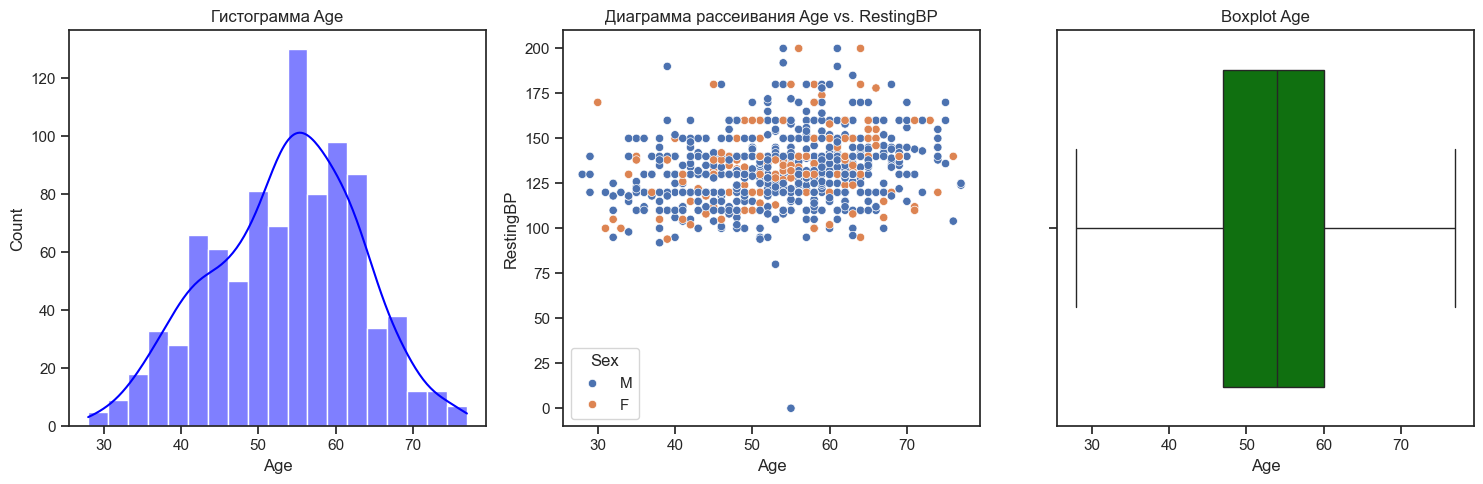

In [20]:
# ================================================
# 11) Построить гистограмму, диаграмму рассеивания и 'ящик с усами'
#    (Boxplot) для одного из полей исходного набора
# ================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Гистограмма
sns.histplot(data=df, x='Age', ax=axes[0], kde=True, color='blue')
axes[0].set_title('Гистограмма Age')

# 2. Диаграмма рассеяния (scatter) Age vs. RestingBP
sns.scatterplot(data=df, x='Age', y='RestingBP', hue='Sex', ax=axes[1])
axes[1].set_title('Диаграмма рассеивания Age vs. RestingBP')

# 3. Boxplot
sns.boxplot(data=df, x='Age', ax=axes[2], color='green')
axes[2].set_title('Boxplot Age')

# Настройка макета
plt.tight_layout()
plt.show()

In [22]:
# 12) Построить интерактивный отчёт с помощью Pandas-Profiling
profile = ProfileReport(
    df,
    title="Интерактивный отчет для анализа данных",
    explorative=True  # Включает расширенный анализ
)

# Отображение отчета в Jupyter Notebook
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]


Shape of your Data Set loaded: (918, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables

################ Binary_Classification problem #####################
    All variables classified into correct types.


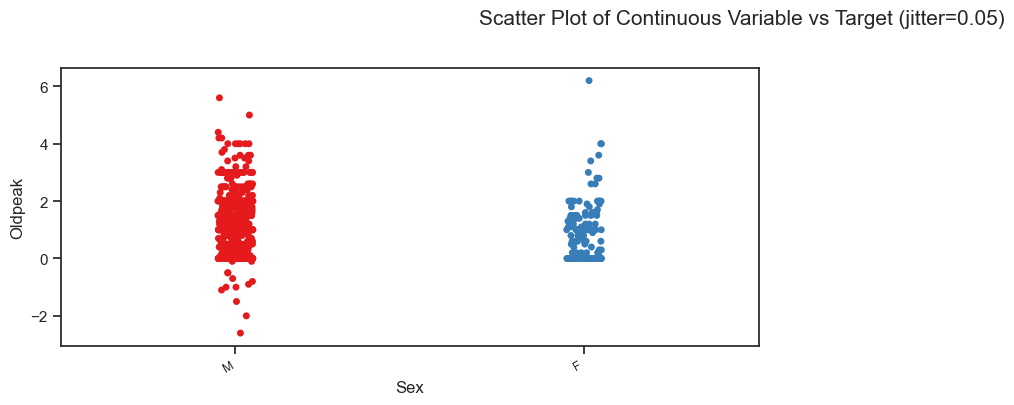

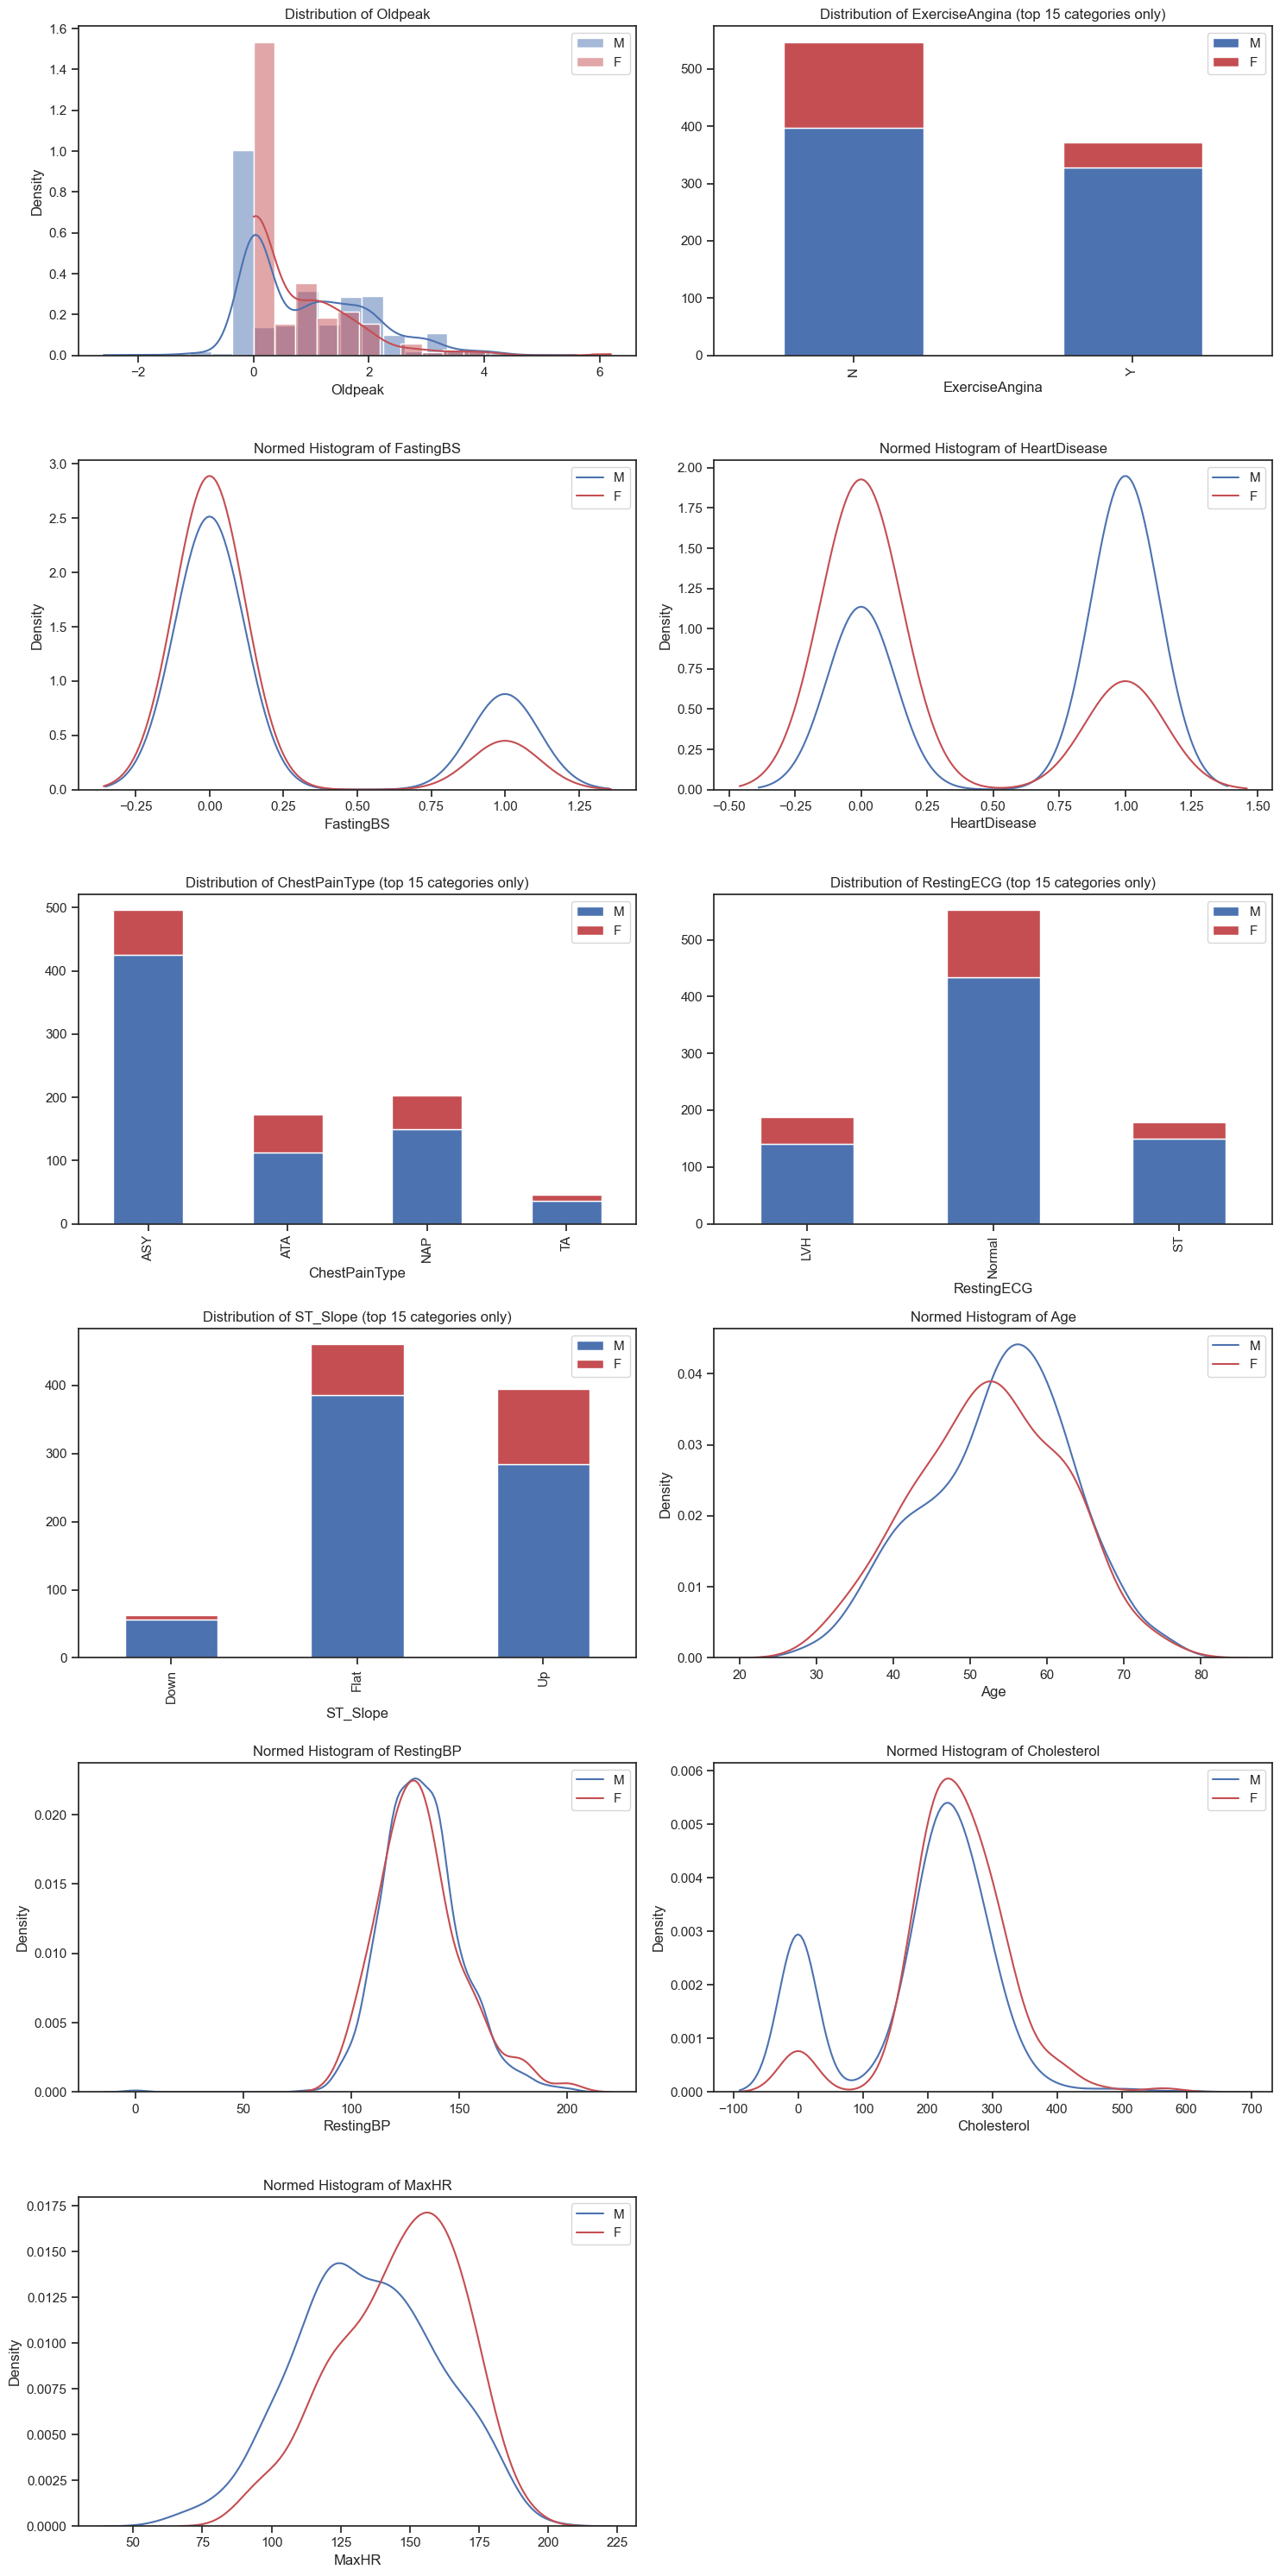

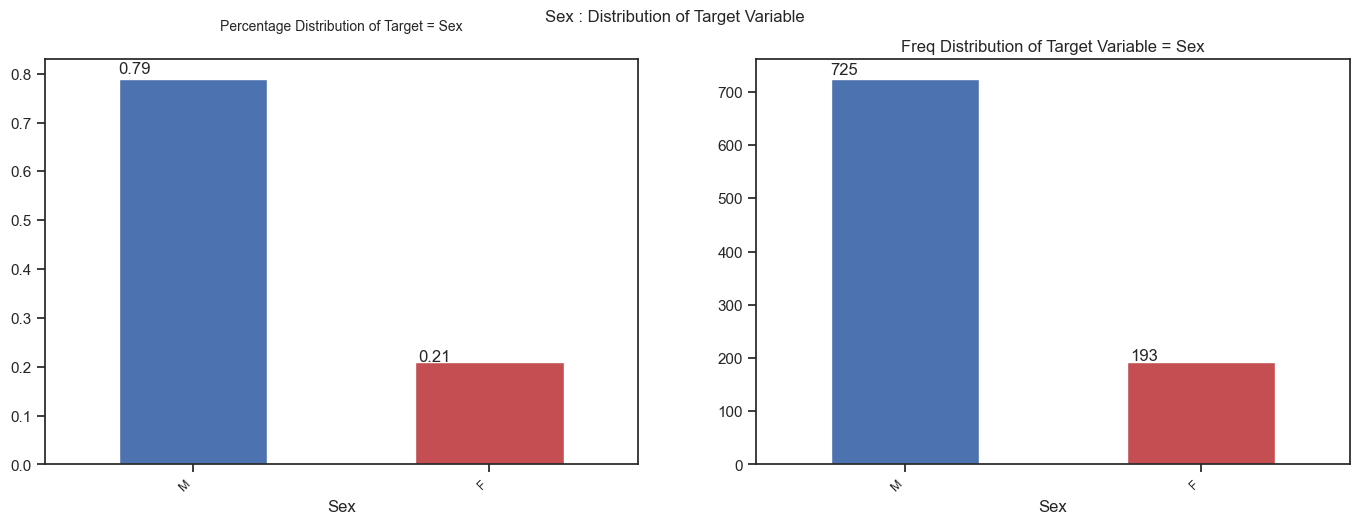

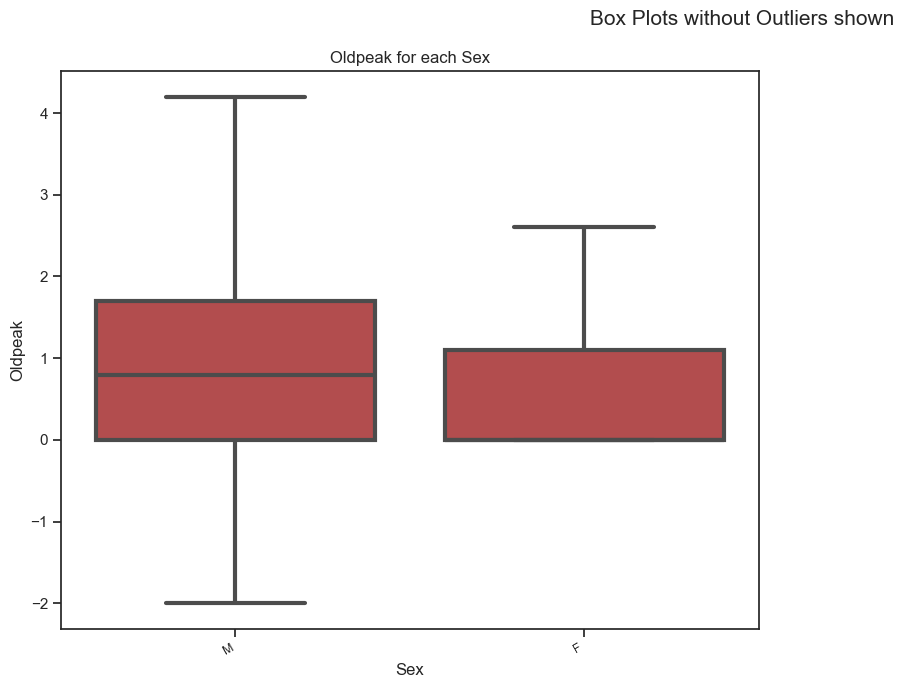

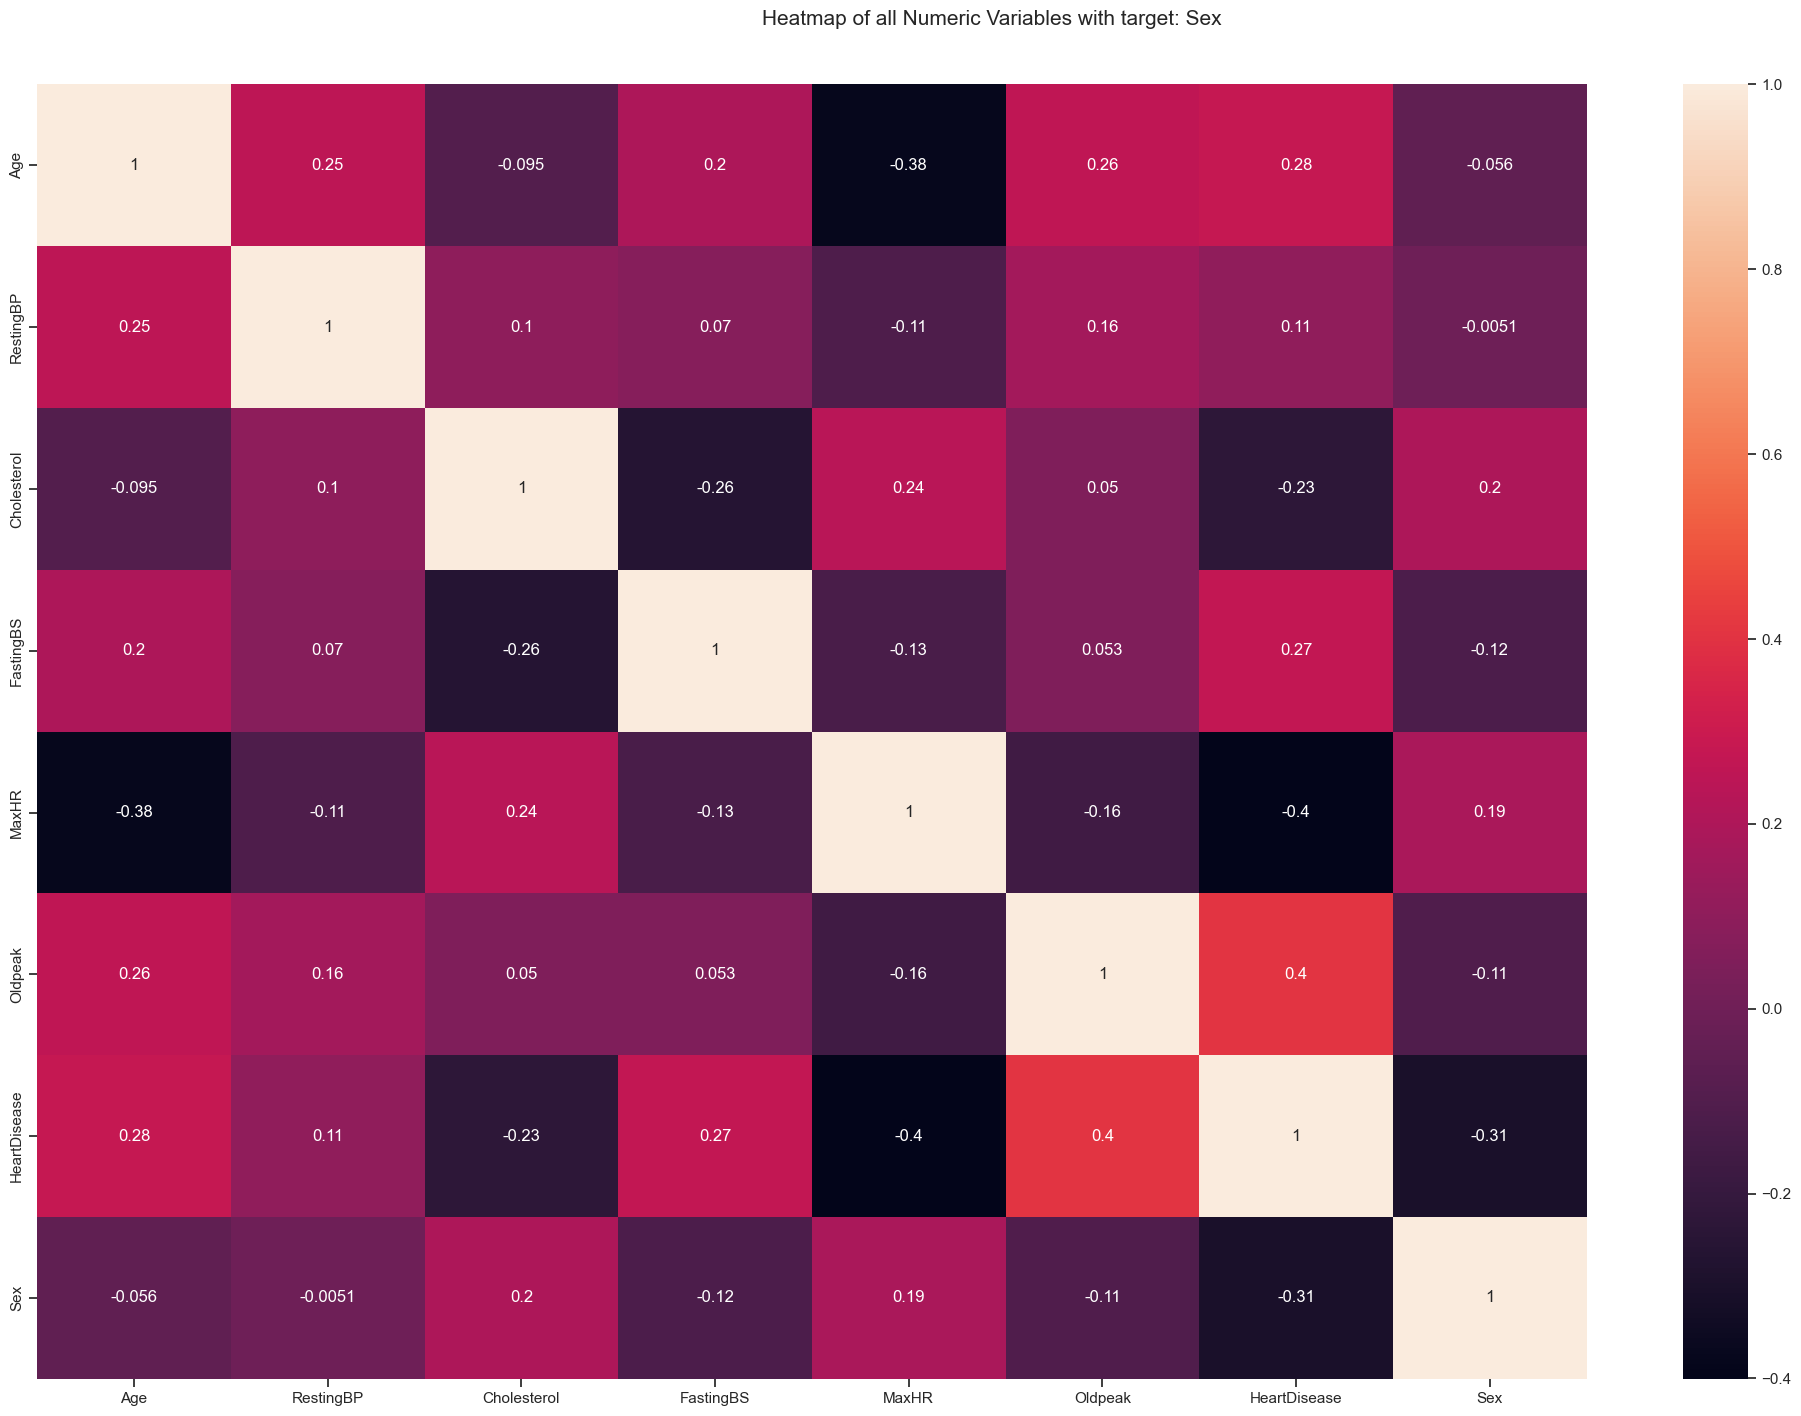

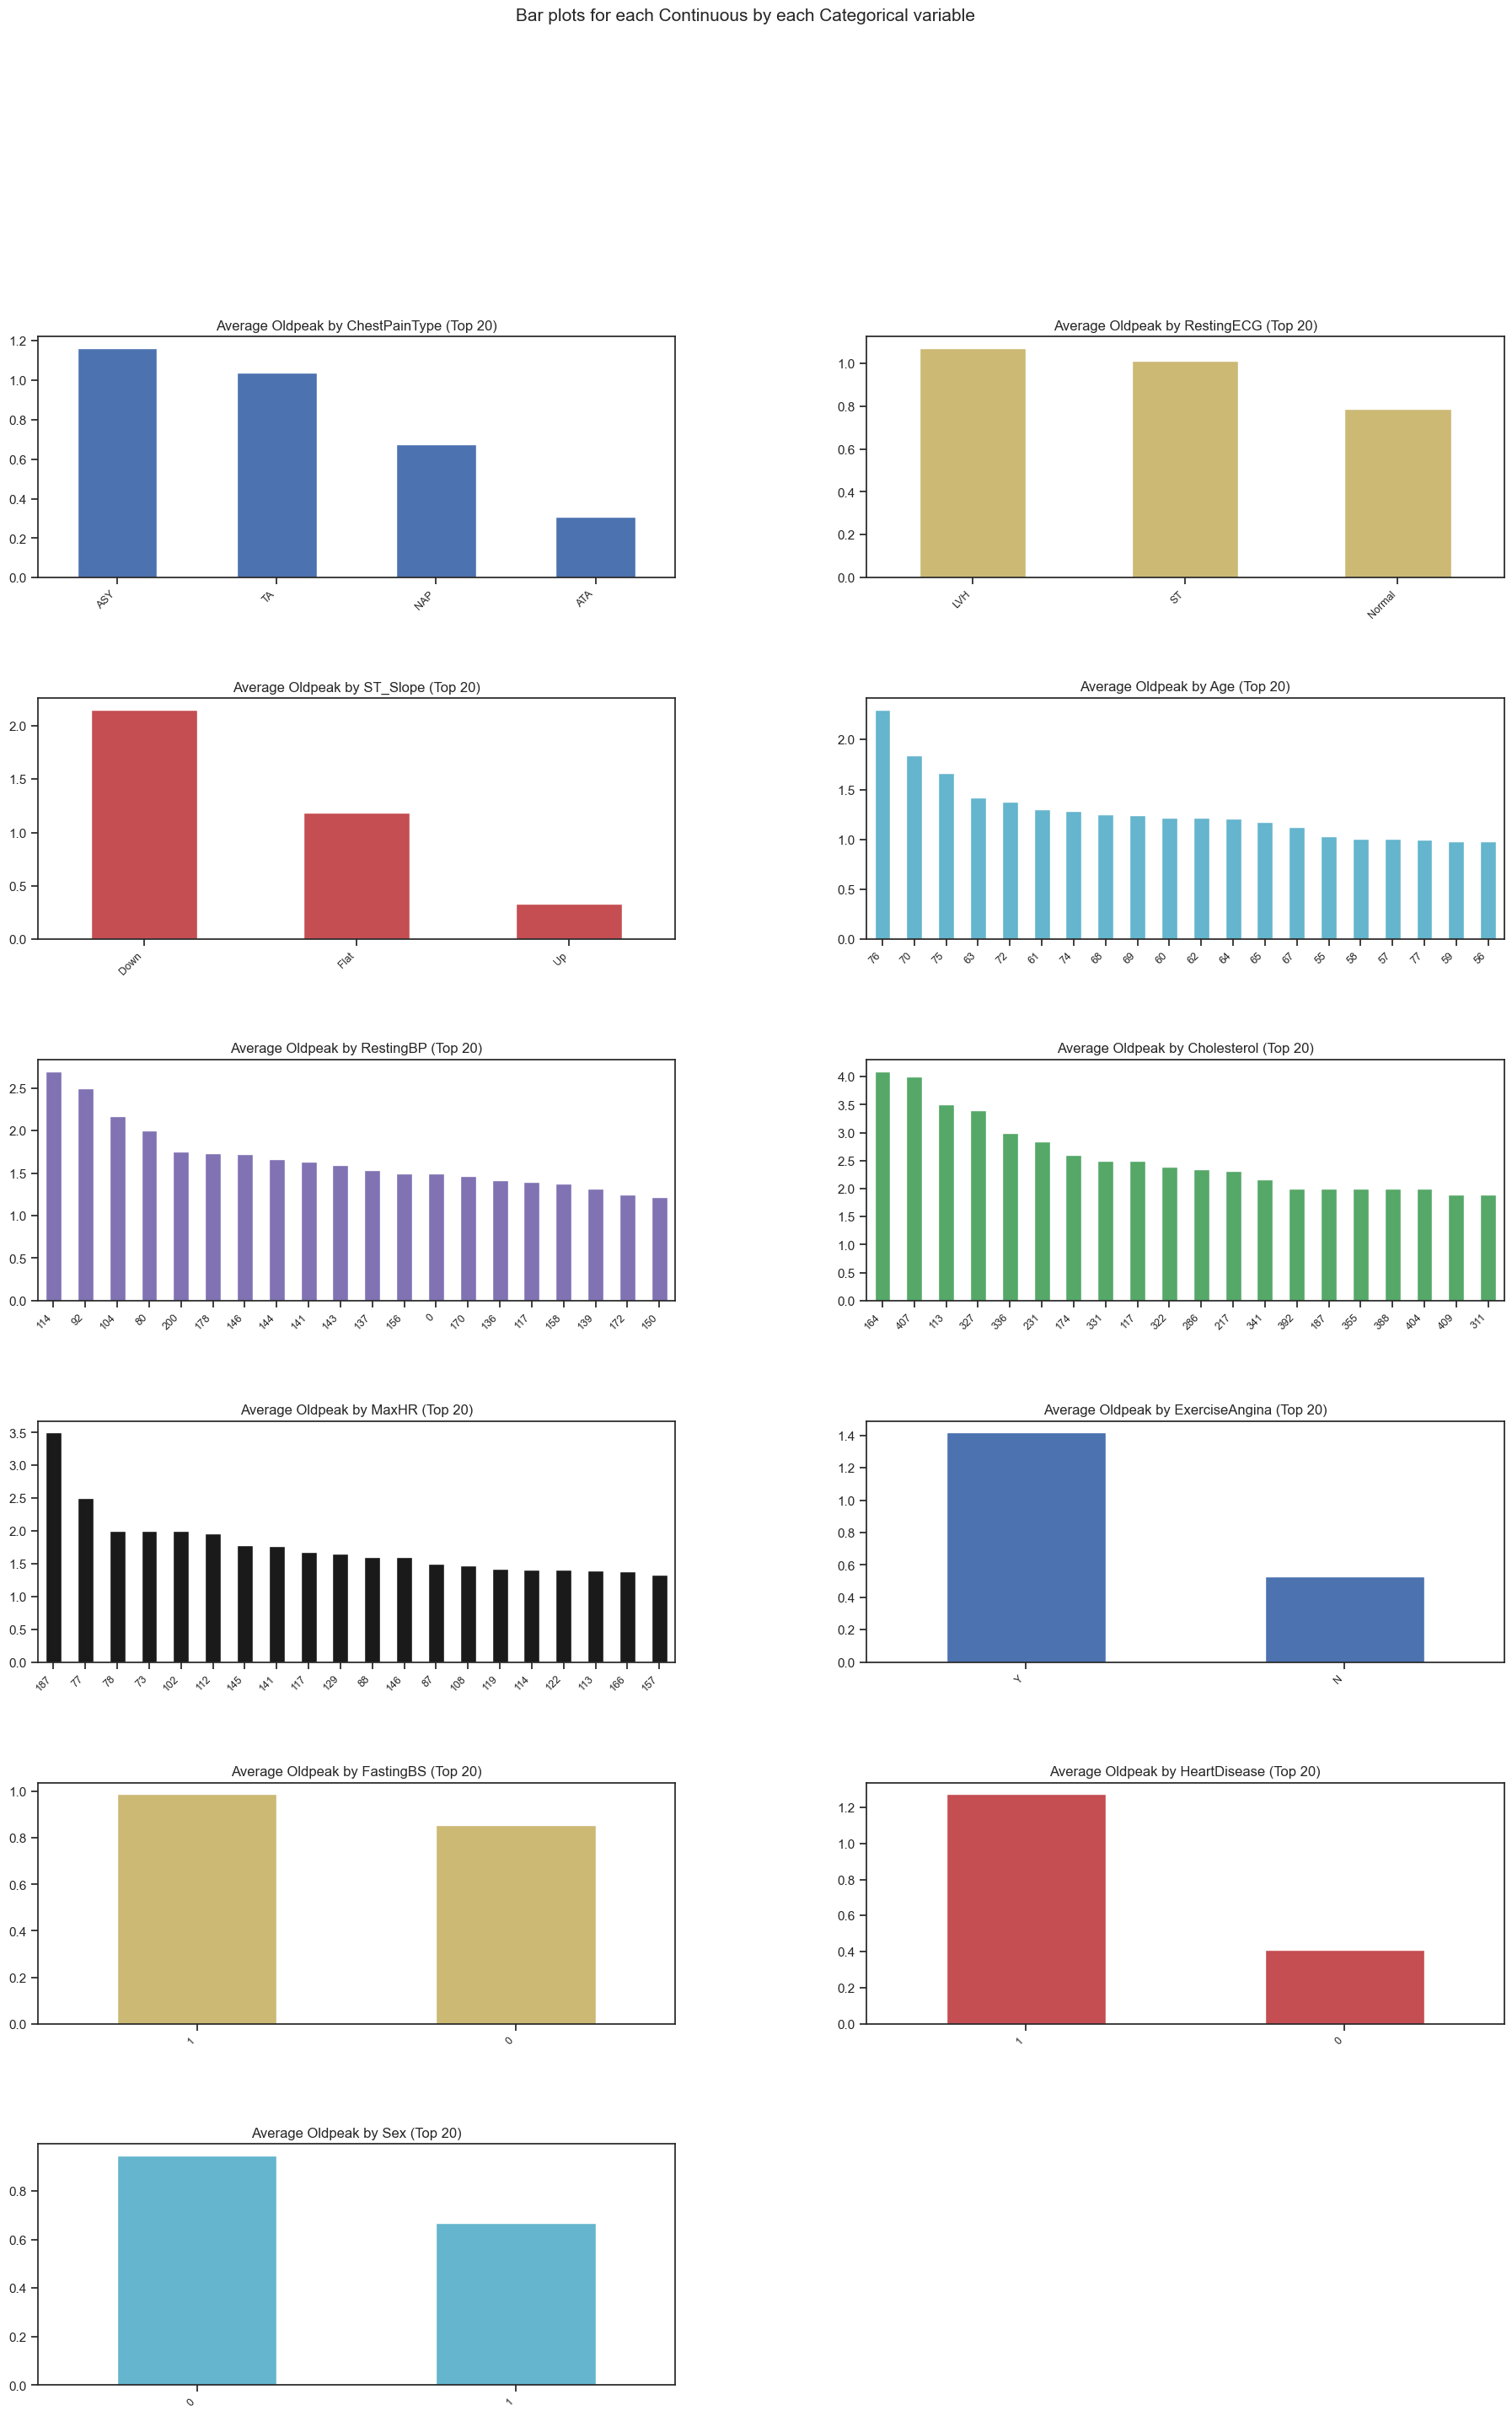

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [23]:
# 13) Построить графики по прогнозируемому параметру
#     (например, по 'diagnosis'), используя AutoViz

AV = AutoViz_Class()

# Генерация визуализаций
df_autoviz = AV.AutoViz(
    filename="",  # Если данные уже загружены в DataFrame, оставляем пустым
    sep=",",      # Разделитель (не используется, если данные уже в DataFrame)
    depVar="Sex",  # Указываем целевую переменную (например, 'Sex')
    dfte=df.copy(),  # Передаем DataFrame
    header=0,     # Заголовки строк (0, если есть)
    verbose=0,    # Уровень детализации (0 - минимальный)
    lowess=False, # Использовать ли сглаживание LOWESS
    chart_format="svg",  # Формат графиков (svg для высокого качества)
    max_rows_analyzed=150000,  # Максимальное количество строк для анализа
    max_cols_analyzed=50       # Максимальное количество столбцов для анализа
)

# Автоматически будут сгенерированы графики, показывающие взаимосвязь 
# между признаками, включая наш столбец 'diagnosis'.